In [1]:
from snn.Model import Model
from snn.LIF import LIF
from snn.Synapse import Synapse
import matplotlib.pyplot as plt

In [2]:
model = Model([1, 1], LIF, Synapse)

In [3]:
# add spikes for all dt from -5 to 5
time = 0
model.add_spike(0, 0, time)
for i in range(1, 6):
    time += i
    model.add_spike(1, 0, time)
    time += i
    model.add_spike(0, 0, time)
    

In [4]:
chart_data_x = []
chart_data_y = []
last_spike = model.next_step()
weight = model.synapses[0, 0, 0].weight
while not model.is_queue_empty():
    spike_time = model.next_step()
    new_weight = model.synapses[0, 0, 0].weight
    dt = spike_time - last_spike
    dweight = new_weight - weight
    chart_data_y.append(dweight)
    if dweight >= 0:
        chart_data_x.append(dt)
    else:
        chart_data_x.append(-dt)
    last_spike = spike_time
    weight = new_weight

chart_data_x, chart_data_y

([0, 1, -1, 0, 2, -2, 0, 3, -3, 0, 4, -4, 0, 5, -5, 0],
 [0.0,
  8.187307529139431e-05,
  -6.549846025938333e-05,
  0.0,
  6.703200459012848e-05,
  -5.36256036935967e-05,
  0.0,
  5.4881163598419214e-05,
  -4.390493089634351e-05,
  0.0,
  4.493289640272735e-05,
  -3.594631713654817e-05,
  0.0,
  3.678794410977293e-05,
  -2.9430355299564503e-05,
  0.0])

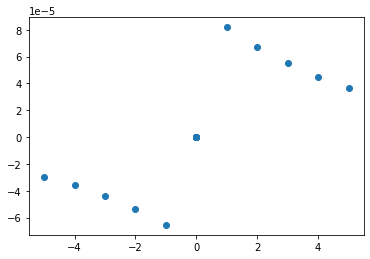

In [5]:
plt.scatter(chart_data_x, chart_data_y)
